Scaling & Normalization 

[Data normalization guide](https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [77]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
d = np.random.exponential(size=1000)

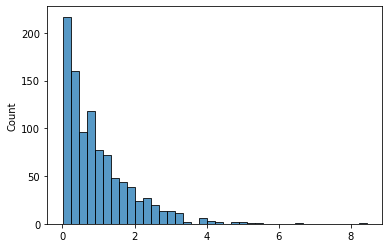

In [3]:
sns.histplot(data=d);

In [4]:
!pip install mlxtend

In [5]:
from mlxtend.preprocessing import minmax_scaling

In [6]:
d_scaled = minmax_scaling(d, columns=0)

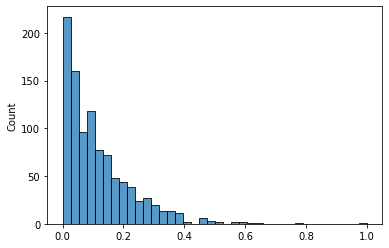

In [7]:
sns.histplot(d_scaled);

In [8]:
from scipy import stats

In [9]:
normal_d = stats.boxcox(d)

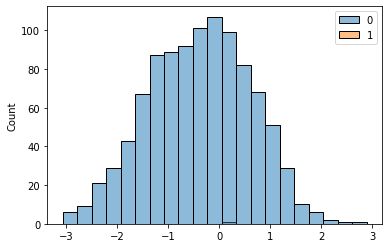

In [10]:
sns.histplot(normal_d);

In [11]:
nyc = pd.read_csv('Datasets/NYCAIRBNB.csv')

In [12]:
nyc

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [13]:
nyc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [14]:
nyc.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
nyc = nyc[nyc['host_name'].notna()]
nyc = nyc[nyc['name'].notna()]

In [17]:
nyc.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
nyc['reviews_per_month'].fillna(nyc['reviews_per_month'].mean(), inplace=True)

In [19]:
nyc.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

[Data cleaning techniques](https://monkeylearn.com/blog/data-cleaning-techniques/)

In [64]:
ms = pd.read_csv('Datasets/MS_USA.csv', parse_dates=True)

In [65]:
ms

,Date,City,State,Dead,Injured,Total,Description
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par..."
...,...,...,...,...,...,...,...
2642,1933-06-17,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...
2643,1929-12-25,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...
2644,1929-02-14,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...
2645,1927-11-21,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...


In [66]:
ms.isna().sum()

Date           0
City           0
State          5
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

In [67]:
ms = ms[ms['State'].notna()]

In [68]:
ms.isna().sum()

Date           0
City           0
State          0
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

In [69]:
state_incidents = ms.groupby('State').State.count().sort_values(ascending=False)

In [70]:
city_incidents = ms.groupby('City').City.count().sort_values(ascending=False)

In [71]:
state_casualties = ms.groupby('State').Total.sum().sort_values(ascending=False)

In [72]:
state_casualties

State
California                        1441
Illinois                          1396
Texas                             1377
Florida                            826
New York                           677
Pennsylvania                       628
Louisiana                          596
Nevada                             589
Ohio                               548
South Carolina                     444
North Carolina                     433
Georgia                            427
Michigan                           415
Missouri                           392
Colorado                           376
Tennessee                          375
Maryl                              359
Alabama                            335
Virginia                           335
New Jersey                         301
Mississippi                        288
Indiana                            263
Wisconsin                          238
Washington                         223
Arkansas                           214
Kentucky           

In [73]:
import datetime

In [74]:
ms['Date'].dtype

dtype('O')

In [78]:
ms['Date'] = pd.to_datetime(ms['Date'])

In [79]:
ms['Date'].dtype

dtype('<M8[ns]')

In [82]:
ms['Date'].dt.year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
2642    1933
2643    1929
2644    1929
2645    1927
2646    1924
Name: Date, Length: 2642, dtype: int64

In [83]:
ms['Year'] = ms['Date'].dt.year

In [84]:
ms

,Date,City,State,Dead,Injured,Total,Description,Year
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...,2022
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...,2022
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...,2022
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...,2022
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par...",2022
...,...,...,...,...,...,...,...,...
2642,1933-06-17,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...,1933
2643,1929-12-25,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...,1929
2644,1929-02-14,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...,1929
2645,1927-11-21,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...,1927


In [96]:
last_10 = ms.groupby('Year').Year.count().sort_values(ascending=False)[:10]

In [97]:
last_10

Year
2021    696
2020    616
2019    442
2022    371
2018    322
2017     21
2015     13
2012     12
2016     11
2009      7
Name: Year, dtype: int64

In [98]:
last_10.index

Int64Index([2021, 2020, 2019, 2022, 2018, 2017, 2015, 2012, 2016, 2009], dtype='int64', name='Year')

In [99]:
last_10.values

array([696, 616, 442, 371, 322,  21,  13,  12,  11,   7], dtype=int64)

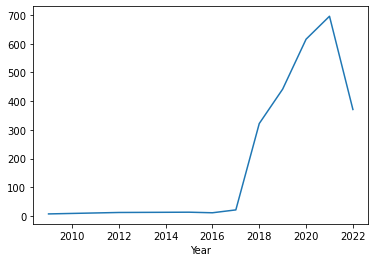

In [100]:
sns.lineplot(x=last_10.index, y=last_10.values);

In [101]:
ms['Month'] = ms['Date'].dt.month

In [102]:
ms

,Date,City,State,Dead,Injured,Total,Description,Year,Month
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...,2022,7
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...,2022,7
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...,2022,7
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...,2022,7
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par...",2022,7
...,...,...,...,...,...,...,...,...,...
2642,1933-06-17,Kansas City,Missouri,5,3,8,Kansas City Massacre: Four law enforcement off...,1933,6
2643,1929-12-25,Germanton,North Carolina,7,0,7,Murder of the Lawson family: Charles Lawson sh...,1929,12
2644,1929-02-14,Chicago,Illinois,7,0,7,Saint Valentine's Day Massacre: Seven members ...,1929,2
2645,1927-11-21,Serene,Colorado,6,0,6,Columbine Mine Massacre: A fight broke out bet...,1927,11


In [104]:
months = ms.groupby('Month').Month.count()

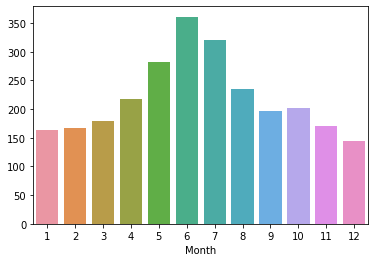

In [105]:
sns.barplot(x=months.index, y=months.values);